In [1]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt

# Красивые шрифты для latex-отчёта (если нужен стандартный matplotlib — можно убрать)
plt.rcParams.update({
    "text.usetex": False,   # если включишь True — нужен установленный LaTeX
    "font.size": 12,
})


In [2]:
one = pd.read_csv("one_step.csv")   # колонки: iter, rel_err
two = pd.read_csv("two_step.csv")

# Проверка, что всё ок
display(one.head())
display(two.head())


,iter,rel_err
0,1,0.407238
1,2,0.221198
2,3,0.134565
3,4,0.087020
4,5,0.058331


,iter,rel_err
0,1,1.023876
1,2,0.225043
2,3,0.068013
3,4,0.021192
4,5,0.006988


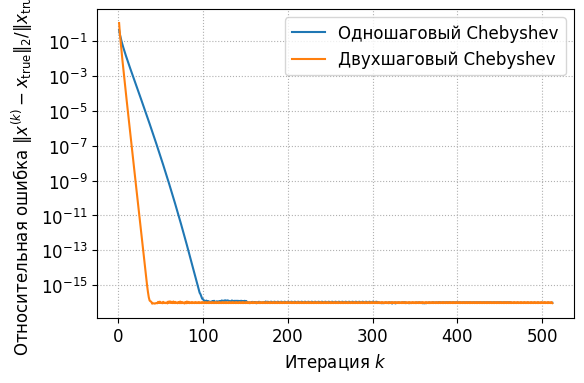

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(one["iter"], one["rel_err"], label="Одношаговый Chebyshev")
ax.plot(two["iter"], two["rel_err"], label="Двухшаговый Chebyshev")

ax.set_yscale("log")
ax.set_xlabel("Итерация $k$")
ax.set_ylabel(r"Относительная ошибка $\|x^{(k)} - x_\mathrm{true}\|_2 / \|x_\mathrm{true}\|_2$")
ax.grid(True, which="both", linestyle=":")
ax.legend()

plt.tight_layout()
plt.show()

# При желании сохраняем для вставки в LaTeX
# fig.savefig("chebyshev_convergence.pdf")
# fig.savefig("chebyshev_convergence.png", dpi=300)


In [17]:
import pandas as pd
import plotly.graph_objects as go

# Загружаем данные
one = pd.read_csv("one_step.csv")   # iter, rel_err
two = pd.read_csv("two_step.csv")

k_max = 256
one_sub = one[one["iter"] <= k_max]
two_sub = two[two["iter"] <= k_max]

# Создаём фигуру
fig = go.Figure()

# Однопараметрический Chebyshev
fig.add_trace(
    go.Scatter(
        x=one_sub["iter"],
        y=one_sub["rel_err"],
        mode="lines",
        name="Однопараметрический Chebyshev",
        line=dict(
            width=3,
            color="rgba(0, 114, 178, 0.8)"  # кастомный цвет + полупрозрачность
        )
    )
)

# Двухпараметрический Chebyshev
fig.add_trace(
    go.Scatter(
        x=two_sub["iter"],
        y=two_sub["rel_err"],
        mode="lines",
        name="Двухпараметрический Chebyshev",
        line=dict(
            width=3,
            dash="dash",
            color="rgba(204, 121, 167, 0.8)"  # другой цвет + полупрозрачность
        )
    )
)

# Логарифмическая шкала по Y
fig.update_yaxes(
    type="log",
    title_text=r"Относительная ошибка $\|x^{(k)} - x^\ast\|_2 / \|x^\ast\|_2$"
)

# Оформление оси X
fig.update_xaxes(
    title_text=f"Итерация k (до {k_max})",
    range=[0, k_max]  # немножко прижать к диапазону
)

# Общий стиль
fig.update_layout(
    template="simple_white",
    width=800,
    height=500,
    legend=dict(
        x=0.02, y=0.98,
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=1
    ),
    margin=dict(l=60, r=20, t=40, b=60),
)

fig.show()

# Если нужно сохранить в PNG для LaTeX:
# (нужен пакет `kaleido`: pip install -U kaleido)
# fig.write_image("Shodimist_plotly.png", scale=2)


In [11]:
Ns = [4, 10, 16, 25, 32, 45, 64, 128, 150, 200, 256]

table = pd.DataFrame({
    "N": Ns,
    "one_step_rel_err": [one.loc[one["iter"] == N, "rel_err"].values[0] for N in Ns],
    "two_step_rel_err": [two.loc[two["iter"] == N, "rel_err"].values[0] for N in Ns],
})

table


,N,one_step_rel_err,two_step_rel_err
0,4,8.701996e-02,2.119230e-02
1,10,9.917155e-03,3.541733e-05
2,16,1.418275e-03,7.657815e-08
3,25,8.252241e-05,8.387319e-12
4,32,8.848968e-06,7.013292e-15
5,45,1.226590e-07,9.926208e-17
6,64,1.493889e-10,9.695524e-17
7,128,1.336152e-16,9.656455e-17
8,150,1.267735e-16,9.637615e-17
9,200,1.165993e-16,9.656455e-17


In [12]:
# CSV для архива/проверки
table.to_csv("chebyshev_errors_summary.csv", index=False)

# Если нужен LaTeX-код таблицы
latex_table = table.to_latex(index=False, float_format="%.3e")
print(latex_table)


\begin{tabular}{rrr}
\toprule
N & one_step_rel_err & two_step_rel_err \\
\midrule
4 & 8.702e-02 & 2.119e-02 \\
10 & 9.917e-03 & 3.542e-05 \\
16 & 1.418e-03 & 7.658e-08 \\
25 & 8.252e-05 & 8.387e-12 \\
32 & 8.849e-06 & 7.013e-15 \\
45 & 1.227e-07 & 9.926e-17 \\
64 & 1.494e-10 & 9.696e-17 \\
128 & 1.336e-16 & 9.656e-17 \\
150 & 1.268e-16 & 9.638e-17 \\
200 & 1.166e-16 & 9.656e-17 \\
256 & 1.165e-16 & 9.656e-17 \\
\bottomrule
\end{tabular}

